<a href="https://colab.research.google.com/github/DaffaFathir/Machine-Learning-Task/blob/main/Tugas%2012/CNN_DenseNet_Daffa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
# Nama    : Daffa Fathir Fajri
# NIM     : 1103213149
# Kelas   : TK-45-04
# Lecture : 12
# Model   : CNN (DenseNet)
# Dataset : Fashion MNIST

chatGPT promph : https://chatgpt.com/share/19b146d0-c916-498c-96fa-844153d4128a

**Pertama, kita perlu mengimpor semua pustaka yang diperlukan.**

In [106]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, Activation, Concatenate, GlobalAveragePooling2D, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from google.colab import drive


**Hubungkan Google Drive agar kita bisa mengakses dataset.**

In [107]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Baca file train.csv dan test.csv dari Google Drive.**

In [108]:
# Path to your dataset files
train_path = '/content/drive/MyDrive/Machine Learning/Fashion/fashion-mnist_train.csv'
test_path = '/content/drive/MyDrive/Machine Learning/Fashion/fashion-mnist_test.csv'

# Load datasets
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

**Pisahkan fitur dan label, normalisasi data, dan ubah label menjadi one-hot encoding.**

In [109]:
# Split features and labels
X_train = train_df.iloc[:, 1:].values
y_train = train_df.iloc[:, 0].values
X_test = test_df.iloc[:, 1:].values
y_test = test_df.iloc[:, 0].values

# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape data to match the input shape of the CNN
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

**Definisikan arsitektur Dense**

In [110]:
def dense_block(x, blocks, growth_rate):
    for i in range(blocks):
        x1 = BatchNormalization()(x)
        x1 = Activation('relu')(x1)
        x1 = Conv2D(4 * growth_rate, (1, 1), padding='same', kernel_initializer='he_normal')(x1)

        x1 = BatchNormalization()(x1)
        x1 = Activation('relu')(x1)
        x1 = Conv2D(growth_rate, (3, 3), padding='same', kernel_initializer='he_normal')(x1)

        x = Concatenate()([x, x1])
    return x


**Definisikan Block Transisi**

In [111]:
def transition_block(x, reduction):
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(int(tf.keras.backend.int_shape(x)[-1] * reduction), (1, 1), padding='same', kernel_initializer='he_normal')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), padding='same')(x)  # Tambahkan padding='same' di sini
    return x


**membuat Model DenseNet**

In [112]:
input_layer = Input(shape=(28, 28, 1))
x = Conv2D(64, (7, 7), strides=(2, 2), padding='same', kernel_initializer='he_normal')(input_layer)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

x = dense_block(x, 6, 32)
x = transition_block(x, 0.5)

x = dense_block(x, 12, 32)
x = transition_block(x, 0.5)

x = dense_block(x, 24, 32)
x = transition_block(x, 0.5)

x = dense_block(x, 16, 32)

x = GlobalAveragePooling2D()(x)
output_layer = Dense(10, activation='softmax')(x)

model = Model(input_layer, output_layer)
model.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_216 (Conv2D)         (None, 14, 14, 64)           3200      ['input_8[0][0]']             
                                                                                                  
 batch_normalization_122 (B  (None, 14, 14, 64)           256       ['conv2d_216[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_104 (Activation  (None, 14, 14, 64)           0         ['batch_normalization_12

**Mengatur parameter untuk training.**

In [113]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**Melatih model dengan data yang sudah disiapkan.**

In [114]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
750/750 [==============================] - 166s 109ms/step - loss: 0.5183 - accuracy: 0.8173 - val_loss: 0.3736 - val_accuracy: 0.8723
Epoch 2/20
750/750 [==============================] - 75s 100ms/step - loss: 0.3091 - accuracy: 0.8879 - val_loss: 0.3315 - val_accuracy: 0.8832
Epoch 3/20
750/750 [==============================] - 77s 103ms/step - loss: 0.2603 - accuracy: 0.9052 - val_loss: 0.3090 - val_accuracy: 0.8917
Epoch 4/20
750/750 [==============================] - 76s 101ms/step - loss: 0.2634 - accuracy: 0.9043 - val_loss: 0.3635 - val_accuracy: 0.8693
Epoch 5/20
750/750 [==============================] - 77s 103ms/step - loss: 0.2578 - accuracy: 0.9099 - val_loss: 54.2847 - val_accuracy: 0.5796
Epoch 6/20
750/750 [==============================] - 74s 99ms/step - loss: 0.3184 - accuracy: 0.8955 - val_loss: 0.2830 - val_accuracy: 0.8997
Epoch 7/20
750/750 [==============================] - 74s 99ms/step - loss: 0.2224 - accuracy: 0.9181 - val_loss: 0.2687 - val_ac

**Mengevaluasi model dengan data uji.**

In [115]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


313/313 [==============================] - 6s 18ms/step - loss: 0.3323 - accuracy: 0.9103
Test Loss: 0.3323497176170349
Test Accuracy: 0.9103000164031982


**Visualisasi kinerja model selama training.**

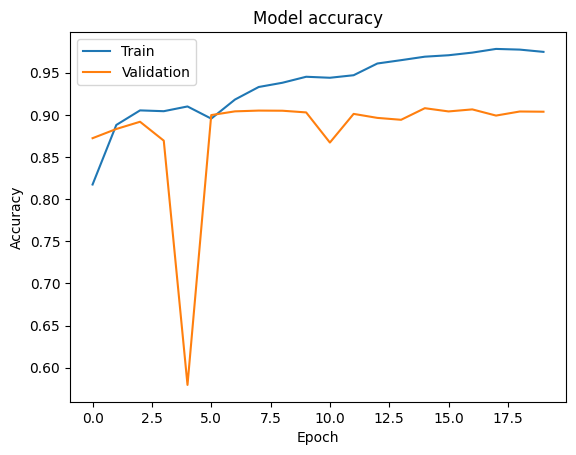

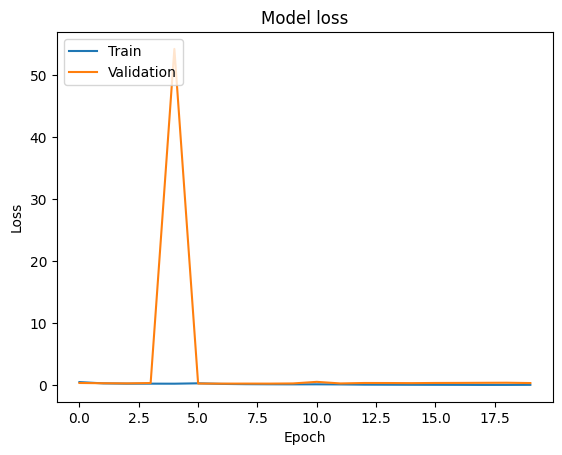

In [116]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
